In [186]:
import numpy as np
import pandas as pd

In [187]:
df=pd.read_csv('/content/drive/MyDrive/My_Code/Data_sets/placement.csv')

In [188]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [189]:
df.shape

(100, 4)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [191]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [192]:
df=df.iloc[:,1:]

In [193]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [194]:
import matplotlib.pyplot as plt

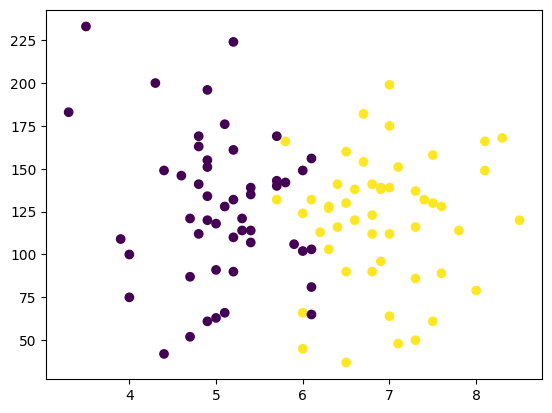

In [195]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [196]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [197]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [198]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [201]:
x_train

,cgpa,iq
99,6.2,113.0
91,7.5,158.0
14,6.1,103.0
86,5.1,128.0
44,7.5,61.0
...,...,...
93,6.8,112.0
12,5.4,139.0
72,7.3,116.0
82,6.5,37.0


In [202]:
y_train

99    1
91    1
14    0
86    0
44    1
     ..
93    1
12    0
72    1
82    1
83    1
Name: placement, Length: 90, dtype: int64

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler=StandardScaler()

In [205]:
x_train=scaler.fit_transform(x_train)

In [206]:
x_train

array([[ 0.21950828, -0.2315222 ],
       [ 1.36604707,  0.88874649],
       [ 0.13131299, -0.48047079],
       [-0.75063993,  0.1419007 ],
       [ 1.36604707, -1.5260549 ],
       [ 0.92507061,  1.90943574],
       [-0.92703051,  1.83475116],
       [ 1.18965649, -1.79989836],
       [ 1.0132659 , -1.84968808],
       [ 1.45424236, -0.82899883],
       [ 0.74868003, -0.80410397],
       [-0.04507759, -0.40578621],
       [ 0.83687532, -0.65473481],
       [ 0.13131299, -1.02815771],
       [-0.13327288,  0.49042874],
       [-1.45620226,  1.9343306 ],
       [ 1.0132659 ,  0.71448247],
       [ 1.63063294, -0.20662734],
       [-1.10342109, -0.87878855],
       [ 0.13131299,  0.24148014],
       [-1.10342109, -0.03236332],
       [-0.75063993,  1.33685397],
       [-0.83883522, -0.1070479 ],
       [ 0.48409416, -0.80410397],
       [-0.22146818,  0.24148014],
       [-0.92703051, -1.5260549 ],
       [ 0.48409416,  0.19169042],
       [-0.83883522, -0.77920911],
       [ 0.92507061,

In [207]:
x_test=scaler.transform(x_test)

In [208]:
x_test

array([[ 1.89521882,  0.66469275],
       [-0.66244463,  0.96343107],
       [ 0.66048474,  1.48622313],
       [-0.22146818,  0.5153236 ],
       [ 1.80702353, -1.07794743],
       [ 0.39589886, -0.15683762],
       [ 1.18965649, -0.90368341],
       [-0.66244463, -0.30620677],
       [-1.0152258 ,  1.16258995],
       [ 0.13131299,  0.83895677]])

In [209]:
from sklearn.linear_model import LogisticRegression

In [210]:
clf=LogisticRegression()

In [211]:
clf.fit(x_train,y_train)

LogisticRegression()

In [212]:
predict=clf.predict(x_test)

In [213]:
predict

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [214]:
y_test

37    1
47    0
97    1
6     0
58    1
13    1
90    1
92    0
75    0
8     0
Name: placement, dtype: int64

In [215]:
from sklearn.metrics import accuracy_score

In [216]:
accuracy_score(y_test,predict)

0.9

In [217]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

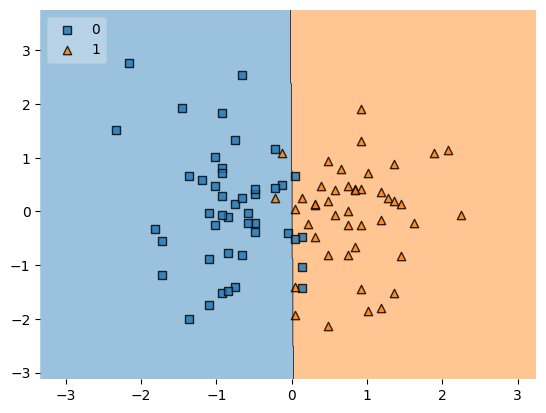

In [218]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)


In [219]:
import pickle

In [220]:
pickle.dump(clf,open('model.pkl','wb'))